## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  86.753024   298.099305  0.599091   6.025690  1.095737
1   3.169486   866.670158  0.810254   8.704507  1.642604
2  88.277329  1120.997966  0.147050  10.553842  1.138789
3  75.547674   292.078702  0.420060   1.268937  0.844594
4  81.375008  1544.587372  0.549277   9.769063  1.403681


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0185930	total: 68.8ms	remaining: 1m 8s
1:	learn: 1.0094699	total: 69.2ms	remaining: 34.5s
2:	learn: 1.0008156	total: 69.7ms	remaining: 23.1s
3:	learn: 0.9927492	total: 70.3ms	remaining: 17.5s
4:	learn: 0.9855730	total: 71ms	remaining: 14.1s
5:	learn: 0.9763723	total: 71.5ms	remaining: 11.8s
6:	learn: 0.9698467	total: 72ms	remaining: 10.2s
7:	learn: 0.9598755	total: 72.4ms	remaining: 8.98s
8:	learn: 0.9532573	total: 73ms	remaining: 8.03s
9:	learn: 0.9459672	total: 73.4ms	remaining: 7.27s
10:	learn: 0.9382342	total: 73.9ms	remaining: 6.65s
11:	learn: 0.9298866	total: 74.5ms	remaining: 6.13s
12:	learn: 0.9206840	total: 75ms	remaining: 5.69s
13:	learn: 0.9118610	total: 75.5ms	remaining: 5.32s
14:	learn: 0.9064676	total: 75.9ms	remaining: 4.99s
15:	learn: 0.8986089	total: 76.5ms	remaining: 4.71s
16:	learn: 0.8903642	total: 77ms	remaining: 4.45s
17:	learn: 0.8857631	total: 77.4ms	remaining: 4.22s
18:	learn: 0.8784429	total: 77.8ms	remaining: 4.02s
19

93:	learn: 0.5469838	total: 109ms	remaining: 1.05s
94:	learn: 0.5441198	total: 109ms	remaining: 1.04s
95:	learn: 0.5409927	total: 110ms	remaining: 1.03s
96:	learn: 0.5375833	total: 110ms	remaining: 1.02s
97:	learn: 0.5340342	total: 110ms	remaining: 1.02s
98:	learn: 0.5316550	total: 111ms	remaining: 1.01s
99:	learn: 0.5288216	total: 111ms	remaining: 1s
100:	learn: 0.5251626	total: 112ms	remaining: 994ms
101:	learn: 0.5232726	total: 112ms	remaining: 986ms
102:	learn: 0.5200797	total: 112ms	remaining: 978ms
103:	learn: 0.5168783	total: 113ms	remaining: 971ms
104:	learn: 0.5148127	total: 113ms	remaining: 964ms
105:	learn: 0.5116873	total: 114ms	remaining: 958ms
106:	learn: 0.5091567	total: 114ms	remaining: 951ms
107:	learn: 0.5066778	total: 114ms	remaining: 945ms
108:	learn: 0.5036320	total: 115ms	remaining: 938ms
109:	learn: 0.5024548	total: 115ms	remaining: 932ms
110:	learn: 0.4996993	total: 115ms	remaining: 925ms
111:	learn: 0.4974888	total: 116ms	remaining: 919ms
112:	learn: 0.4939676	

272:	learn: 0.2689037	total: 186ms	remaining: 495ms
273:	learn: 0.2681307	total: 186ms	remaining: 494ms
274:	learn: 0.2674418	total: 187ms	remaining: 493ms
275:	learn: 0.2666940	total: 187ms	remaining: 491ms
276:	learn: 0.2664424	total: 188ms	remaining: 490ms
277:	learn: 0.2657354	total: 188ms	remaining: 489ms
278:	learn: 0.2641315	total: 189ms	remaining: 488ms
279:	learn: 0.2635225	total: 189ms	remaining: 487ms
280:	learn: 0.2627348	total: 190ms	remaining: 486ms
281:	learn: 0.2619280	total: 190ms	remaining: 484ms
282:	learn: 0.2604190	total: 191ms	remaining: 483ms
283:	learn: 0.2597908	total: 191ms	remaining: 482ms
284:	learn: 0.2590567	total: 191ms	remaining: 480ms
285:	learn: 0.2583062	total: 192ms	remaining: 479ms
286:	learn: 0.2577053	total: 192ms	remaining: 478ms
287:	learn: 0.2564660	total: 193ms	remaining: 476ms
288:	learn: 0.2553423	total: 193ms	remaining: 475ms
289:	learn: 0.2544282	total: 194ms	remaining: 474ms
290:	learn: 0.2529554	total: 194ms	remaining: 473ms
291:	learn: 

512:	learn: 0.1168782	total: 290ms	remaining: 275ms
513:	learn: 0.1166050	total: 290ms	remaining: 275ms
514:	learn: 0.1163515	total: 291ms	remaining: 274ms
515:	learn: 0.1158335	total: 291ms	remaining: 273ms
516:	learn: 0.1155674	total: 292ms	remaining: 273ms
517:	learn: 0.1153550	total: 292ms	remaining: 272ms
518:	learn: 0.1150781	total: 293ms	remaining: 271ms
519:	learn: 0.1146451	total: 293ms	remaining: 271ms
520:	learn: 0.1142209	total: 294ms	remaining: 270ms
521:	learn: 0.1138522	total: 294ms	remaining: 269ms
522:	learn: 0.1137046	total: 295ms	remaining: 269ms
523:	learn: 0.1134356	total: 295ms	remaining: 268ms
524:	learn: 0.1132920	total: 295ms	remaining: 267ms
525:	learn: 0.1130398	total: 296ms	remaining: 266ms
526:	learn: 0.1128978	total: 296ms	remaining: 266ms
527:	learn: 0.1125859	total: 297ms	remaining: 265ms
528:	learn: 0.1120723	total: 297ms	remaining: 264ms
529:	learn: 0.1117695	total: 297ms	remaining: 264ms
530:	learn: 0.1116308	total: 298ms	remaining: 263ms
531:	learn: 

694:	learn: 0.0779154	total: 368ms	remaining: 161ms
695:	learn: 0.0776796	total: 368ms	remaining: 161ms
696:	learn: 0.0775464	total: 369ms	remaining: 160ms
697:	learn: 0.0772800	total: 369ms	remaining: 160ms
698:	learn: 0.0770229	total: 370ms	remaining: 159ms
699:	learn: 0.0767919	total: 370ms	remaining: 159ms
700:	learn: 0.0766972	total: 370ms	remaining: 158ms
701:	learn: 0.0766043	total: 371ms	remaining: 157ms
702:	learn: 0.0763762	total: 371ms	remaining: 157ms
703:	learn: 0.0761524	total: 372ms	remaining: 156ms
704:	learn: 0.0759041	total: 372ms	remaining: 156ms
705:	learn: 0.0756101	total: 372ms	remaining: 155ms
706:	learn: 0.0755192	total: 373ms	remaining: 154ms
707:	learn: 0.0752954	total: 373ms	remaining: 154ms
708:	learn: 0.0752056	total: 373ms	remaining: 153ms
709:	learn: 0.0749686	total: 374ms	remaining: 153ms
710:	learn: 0.0748789	total: 374ms	remaining: 152ms
711:	learn: 0.0747910	total: 375ms	remaining: 152ms
712:	learn: 0.0745714	total: 375ms	remaining: 151ms
713:	learn: 

939:	learn: 0.0428056	total: 472ms	remaining: 30.1ms
940:	learn: 0.0427098	total: 473ms	remaining: 29.6ms
941:	learn: 0.0426250	total: 473ms	remaining: 29.1ms
942:	learn: 0.0425689	total: 473ms	remaining: 28.6ms
943:	learn: 0.0424734	total: 474ms	remaining: 28.1ms
944:	learn: 0.0423791	total: 474ms	remaining: 27.6ms
945:	learn: 0.0422564	total: 475ms	remaining: 27.1ms
946:	learn: 0.0421635	total: 475ms	remaining: 26.6ms
947:	learn: 0.0420431	total: 476ms	remaining: 26.1ms
948:	learn: 0.0419605	total: 476ms	remaining: 25.6ms
949:	learn: 0.0418692	total: 476ms	remaining: 25.1ms
950:	learn: 0.0417882	total: 477ms	remaining: 24.6ms
951:	learn: 0.0417539	total: 477ms	remaining: 24.1ms
952:	learn: 0.0415709	total: 478ms	remaining: 23.6ms
953:	learn: 0.0414786	total: 478ms	remaining: 23ms
954:	learn: 0.0413605	total: 478ms	remaining: 22.5ms
955:	learn: 0.0411974	total: 479ms	remaining: 22ms
956:	learn: 0.0410816	total: 479ms	remaining: 21.5ms
957:	learn: 0.0410034	total: 480ms	remaining: 21ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

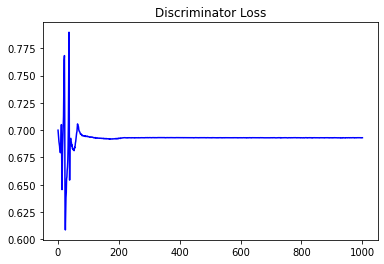

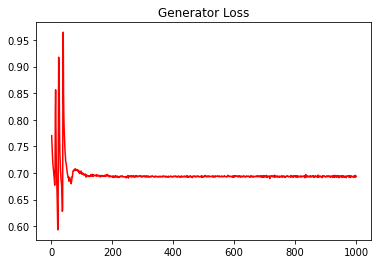

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3544745933928672


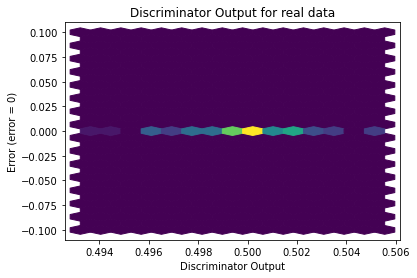

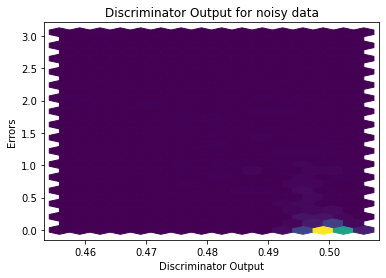

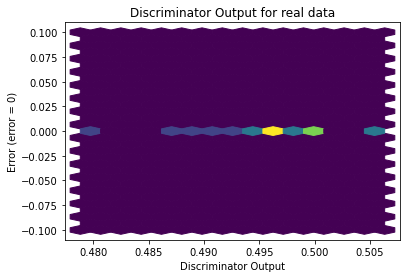

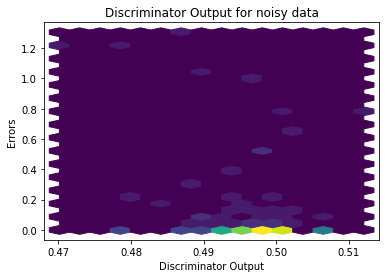

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


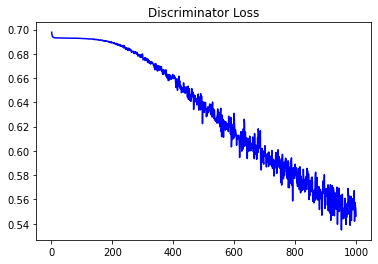

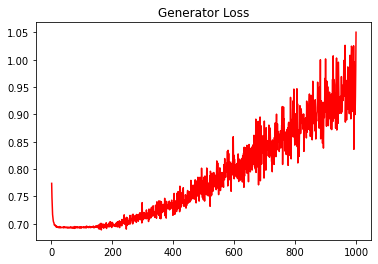

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.32739037400082305


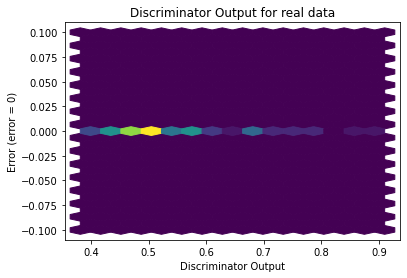

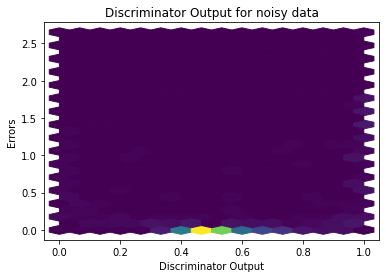

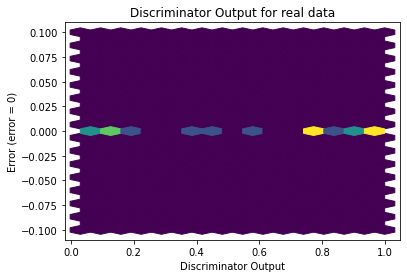

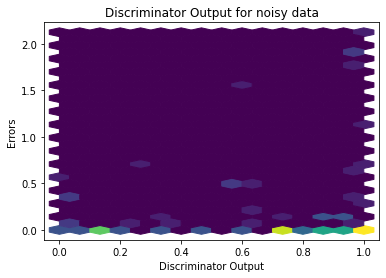

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
